## Session 6 : Hough transform and edge detection

Text(0.5, 1.0, 'prewitt')

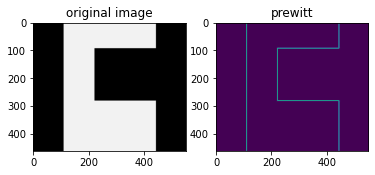

In [1]:
#edge detection filters (differene in filters performance)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.filters import roberts, sobel, scharr, prewitt
astro = cv2.imread('edge.jpg',0)
#edge_roberts = roberts(astro)
#edge_sobel = sobel(astro)
#edge_scharr = scharr(astro)
edge_prewitt = prewitt(astro)
plt.subplot(121)
plt.imshow(astro, 'gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(edge_prewitt)
plt.title('prewitt')

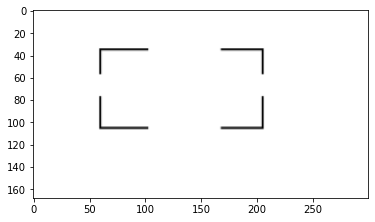

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("lines.png")
plt.imshow(img)

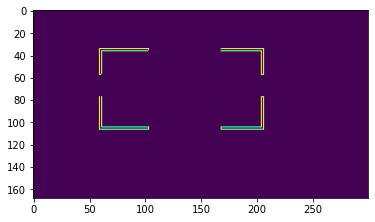

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 20)
plt.imshow(edges)

In [8]:
# Loading the road view video
import cv2
import numpy as np
video = cv2.VideoCapture("road_view.mp4")
while True:
    ret, frame = video.read()
    
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(10)
    if key ==27:
        break
video.release()
cv2.destroyAllWindows()

In [11]:
# video will play nonstop
import cv2
import numpy as np
video = cv2.VideoCapture("road_view.mp4")
while True:
    ret, frame = video.read()
    
    if not ret:
        video = cv2.VideoCapture("road_view.mp4")
        continue
        
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(10)
    if key ==27:
        break
video.release()
cv2.destroyAllWindows()

In [9]:
# Detection of yellow line in video
import cv2
import numpy as np
video = cv2.VideoCapture("road_view.mp4")
while True:
    ret, frame = video.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 94, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
   
    if not ret:
        video = cv2.VideoCapture("road_view.mp4")
        continue
        
    cv2.imshow("frame", frame)
    cv2.imshow("edges", mask)
    
    key = cv2.waitKey(10)
    if key ==27:
        break
video.release()
cv2.destroyAllWindows()

In [13]:
# Detection of yellow line in video with edge detection
import cv2
import numpy as np
video = cv2.VideoCapture("road_view.mp4")
while True:
    ret, frame = video.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 94, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
    edges = cv2.Canny(mask, 75, 150)
    if not ret:
        video = cv2.VideoCapture("road_view.mp4")
        continue
        
    cv2.imshow("frame", frame)
    cv2.imshow("edges", edges)
    
    key = cv2.waitKey(10)
    if key ==27:
        break
video.release()
cv2.destroyAllWindows()

In [10]:
# Detection of yellow line in video with edge detection & Hough lines
import cv2
import numpy as np
video = cv2.VideoCapture("road_view.mp4")
while True:
    ret, frame = video.read()
    if not ret:
        video = cv2.VideoCapture("road_view.mp4")
        continue
        
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 94, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
    edges = cv2.Canny(mask, 75, 150)
    
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
        
    cv2.imshow("frame", frame)
    cv2.imshow("edges", edges)
    
    key = cv2.waitKey(10)
    if key ==27:
        break
video.release()
cv2.destroyAllWindows()

In [15]:
 # Detection of yellow line in video with edge detection, Hough lines & Gaussian filter
import cv2
import numpy as np
video = cv2.VideoCapture("road_view.mp4")
while True:
    ret, ori_frame = video.read()
    frame = cv2.GaussianBlur(ori_frame, (5, 5), 0)
    if not ret:
        video = cv2.VideoCapture("road_view.mp4")
        continue
        
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 94, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
    edges = cv2.Canny(mask, 75, 150)
    
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
        
    cv2.imshow("frame", frame)
    cv2.imshow("edges", edges)
    
    key = cv2.waitKey(10)
    if key ==27:
        break
video.release()
cv2.destroyAllWindows()